# Assignment 2

## Importing the libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 6
import seaborn as sb

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

## Loading Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer ()
df = pd.DataFrame (data=data.data, columns=data.feature_names)

### D1 [2 Marks]

<Figure size 2500x2500 with 0 Axes>

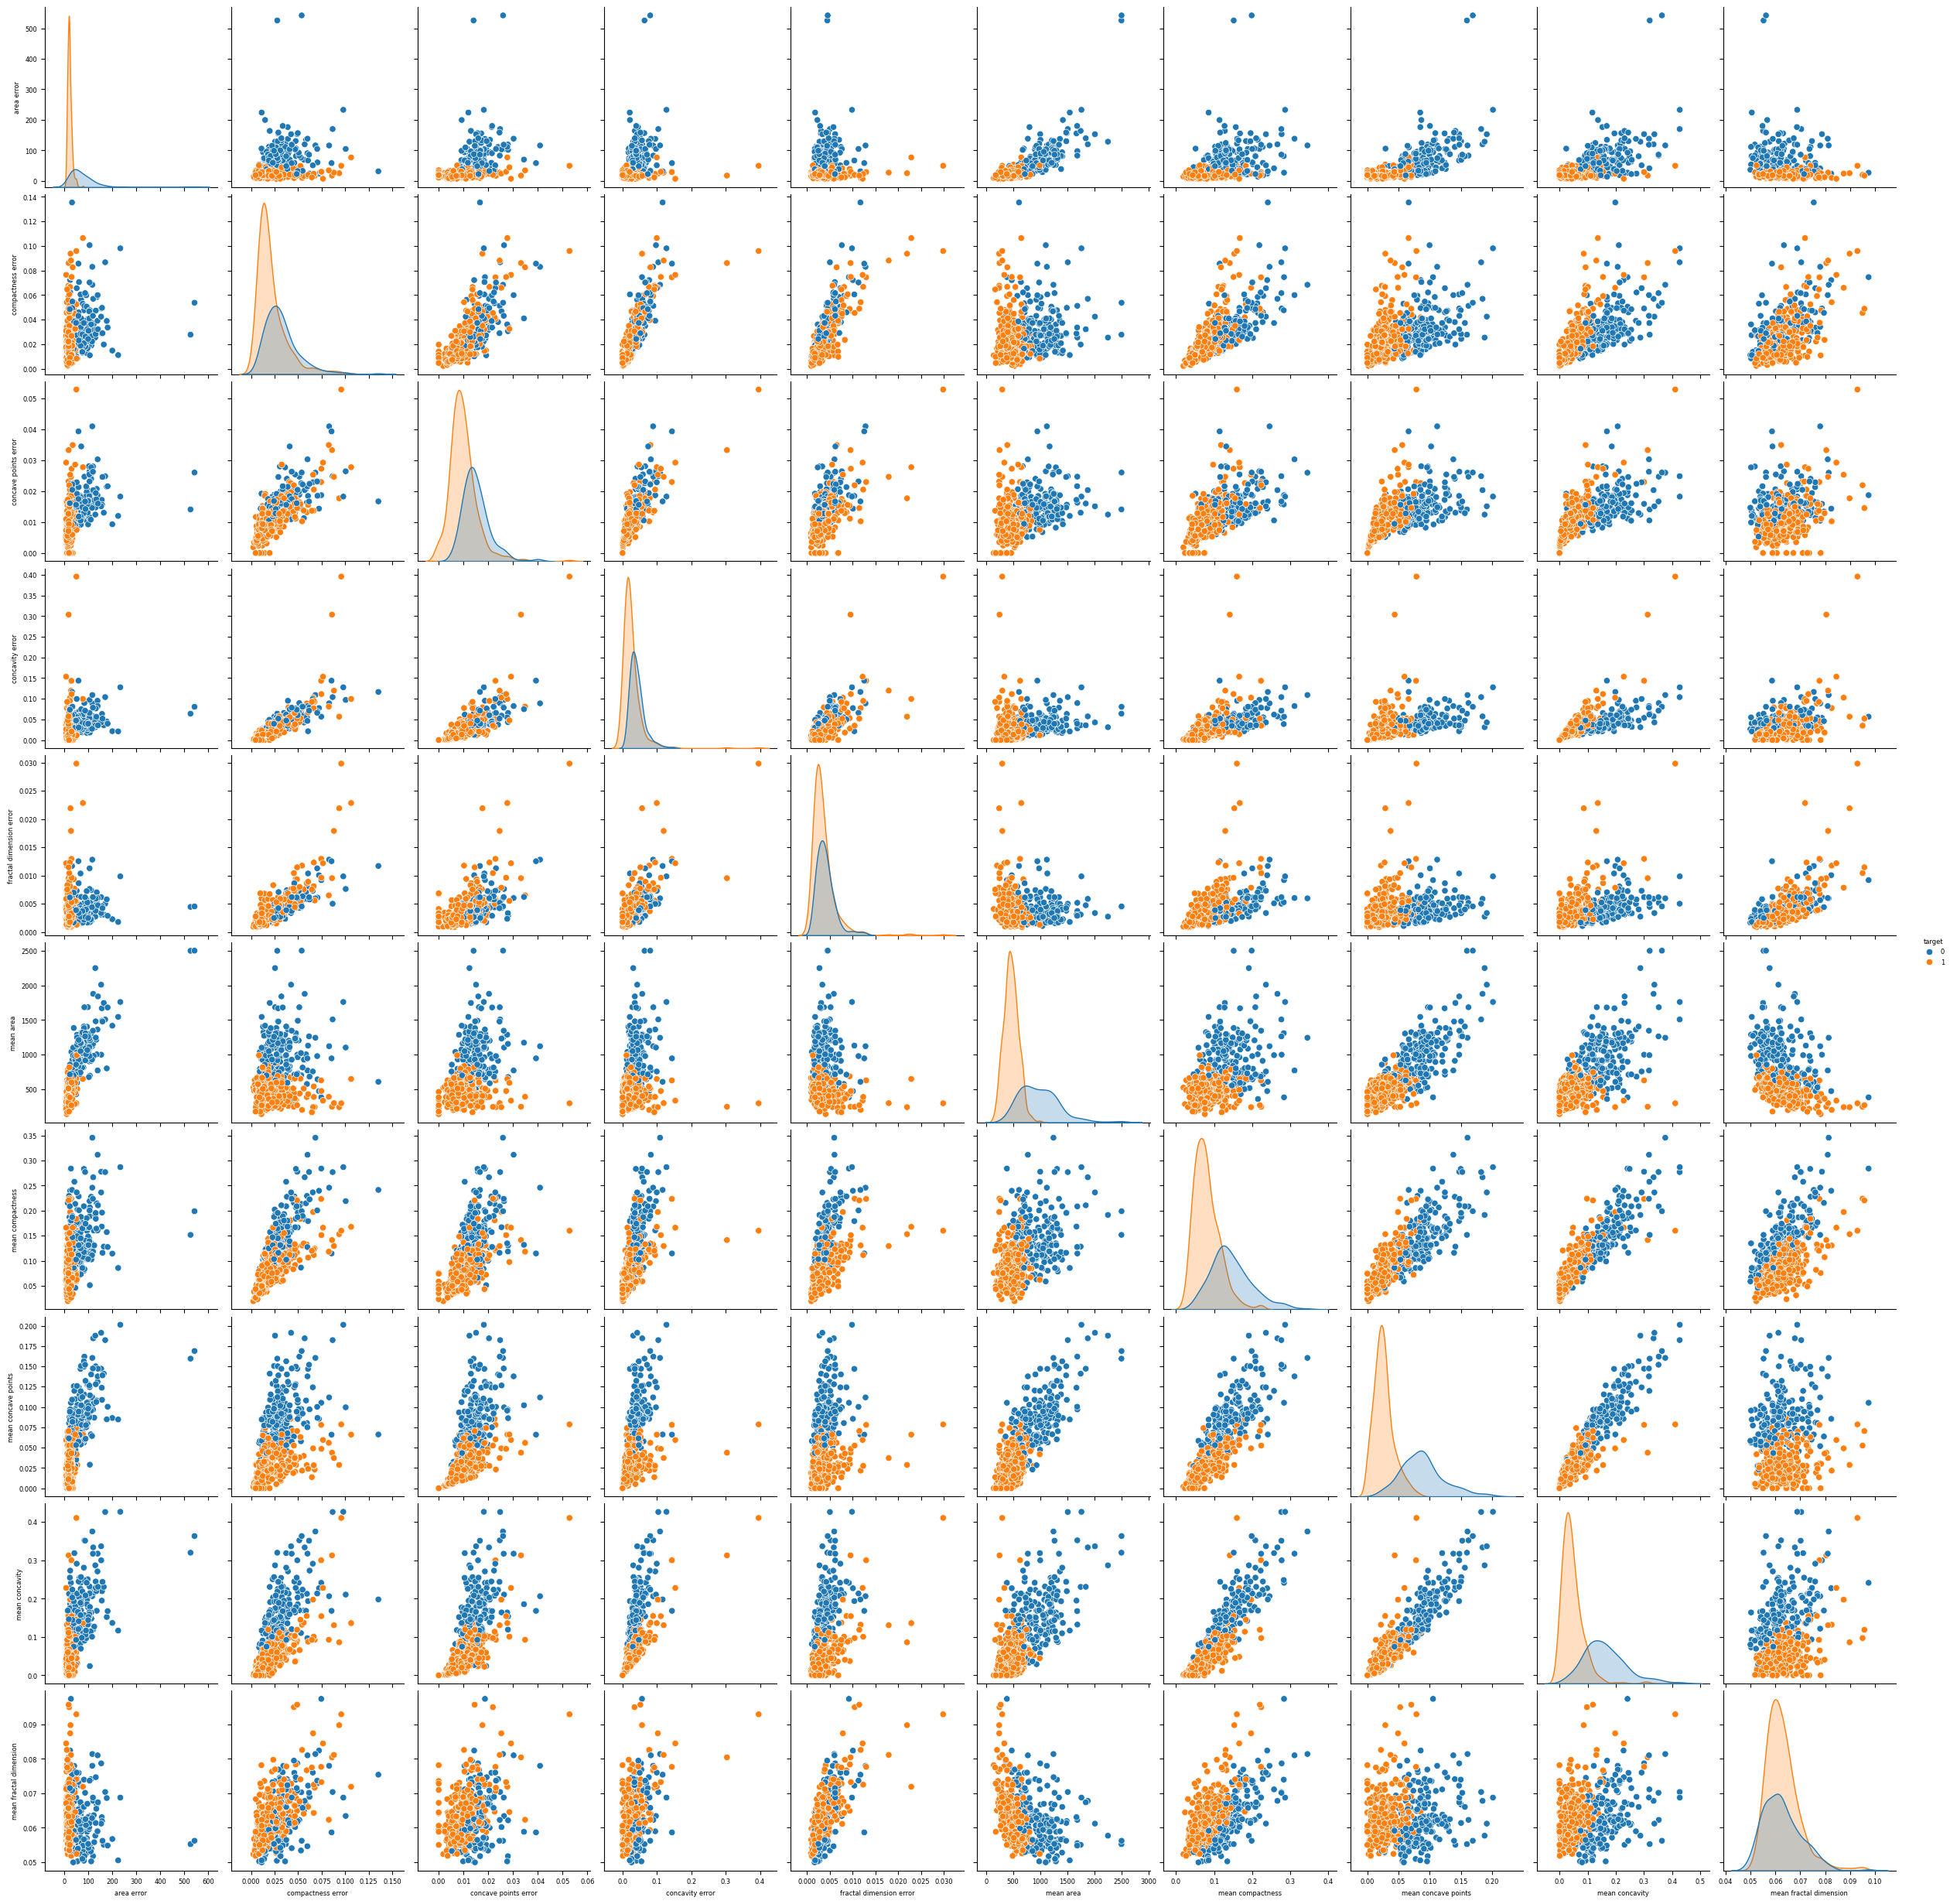

In [3]:
sorted_df =df.sort_index(axis = 1)

# Select the first 10 features for our feature list
features =sorted_df.columns[:10]

sorted_df['target'] = data.target 

# Scatter-plot the relationship between features based on malignant/benign
plt.figure(figsize=(25,25))  
total_grid_scatter =sb.pairplot(sorted_df,hue='target', vars=features)
plt.show()

### D3 [1 mark]

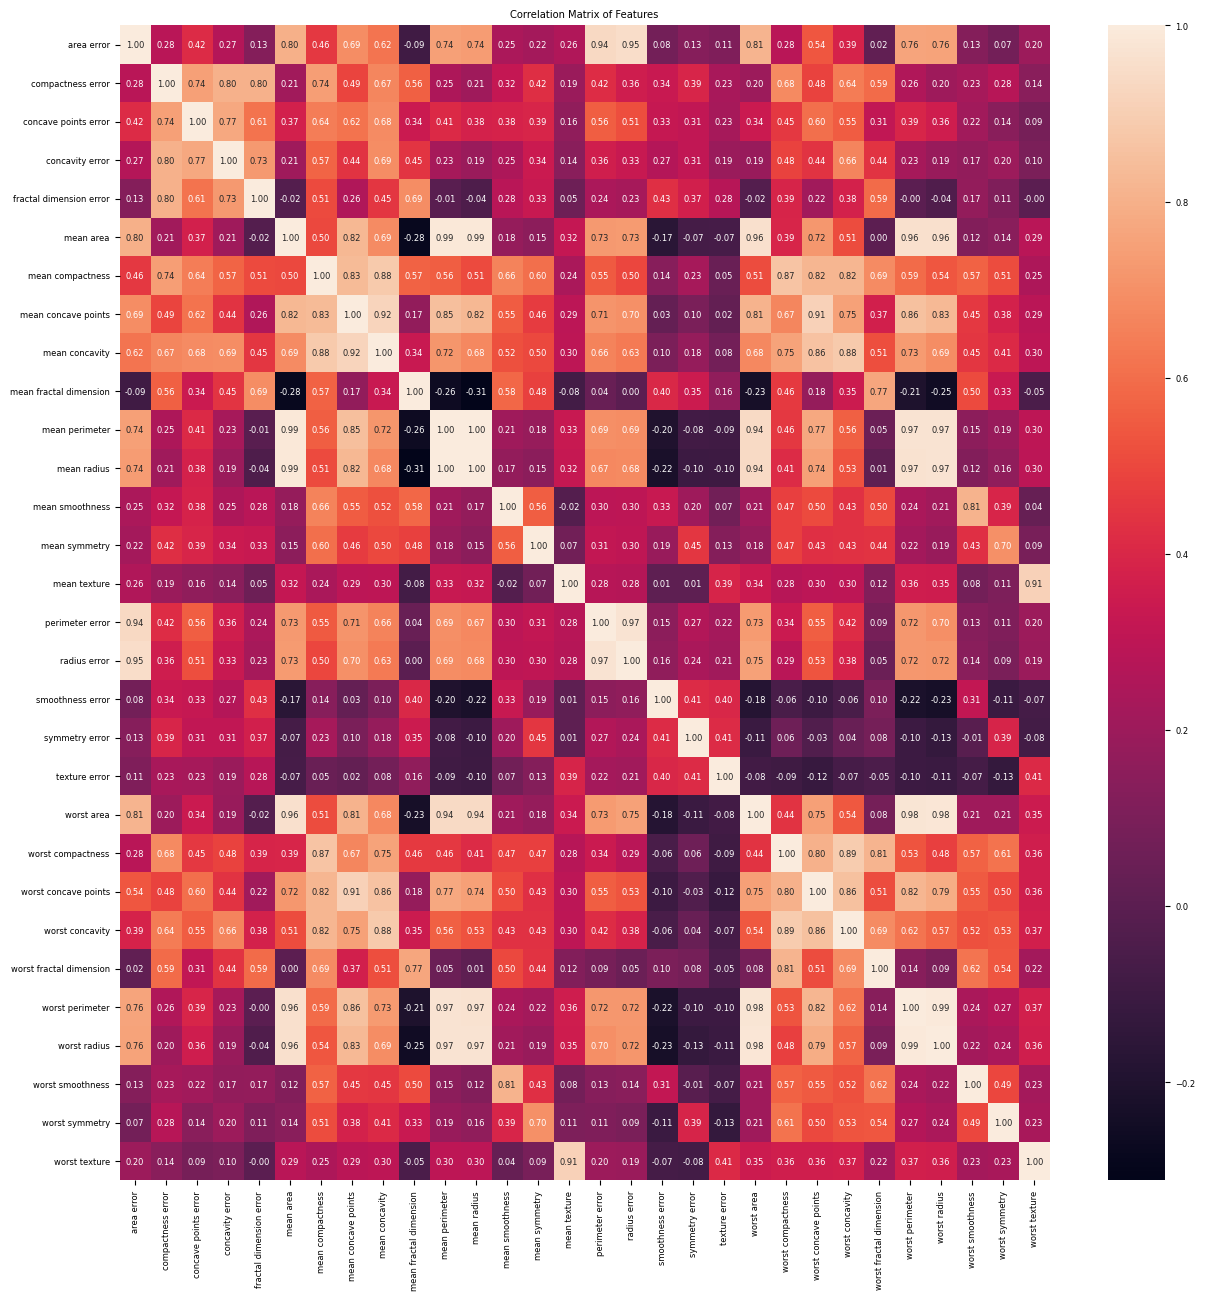

In [4]:
# Drop 'target' column and find correlation matrix with .corr
matrix = sorted_df.drop('target', axis=1).corr()

plt.figure(figsize=(15,15))

# heatmap with annotations, 2 decimal palces
sb.heatmap(matrix, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features')
plt.show()

### D5 [0 mark]

In [5]:
# List of features to drop from task
feature_list =['mean perimeter','mean radius','worst radius','worst perimeter','radius error']

# drop feature columns from list
df_new =sorted_df.drop(feature_list, axis=1)

# drop the name column
matrix =df_new.drop('target', axis=1)

# Check Shape and columns of matrix to ensure drop successful
print(matrix.shape)
print(matrix.columns.tolist())


(569, 25)
['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error', 'smoothness error', 'symmetry error', 'texture error', 'worst area', 'worst compactness', 'worst concave points', 'worst concavity', 'worst fractal dimension', 'worst smoothness', 'worst symmetry', 'worst texture']


### D6 [3 marks]

In [6]:
#NEEDS WORK
# drop labels
x =df_new.drop('target', axis=1)

# Isolate class (malignant/benign) based on labels
y = df_new['target']

# Spliting data into training set and testing set with random state
training, testing, labels, answers= train_test_split(x, y,test_size=0.2, random_state=5508)

# Create Classifier
classifier =DecisionTreeClassifier(random_state=5508)
classifier.fit(training, labels)

# Perform predictions on the training set and the test set
predictions = classifier.predict(training)
testing_predictions = classifier.predict(testing)

# Accuracy/Recall/Precision
accuracy_1 =accuracy_score(labels, predictions)
test_accuracy = accuracy_score(answers, testing_predictions)
precision_1 = precision_score(labels, predictions)
test_preicision = precision_score(answers, testing_predictions)
recall_1 = recall_score(labels, predictions)
test_recall = recall_score(answers, testing_predictions)

# Create confusion matrix
conf_matrix = confusion_matrix(answers, testing_predictions)

# print each statistic and confusion matrix as requested
print("Training set")
print(accuracy_1)
print(precision_1)
print(recall_1)

print("Test set")
print(test_accuracy)
print(test_preicision)
print(test_recall)

print("Confusion Matrix for test set")
print(conf_matrix)

Training set
1.0
1.0
1.0
Test set
0.9649122807017544
0.9726027397260274
0.9726027397260274
Confusion Matrix for test set
[[39  2]
 [ 2 71]]


### D8 [2 marks]

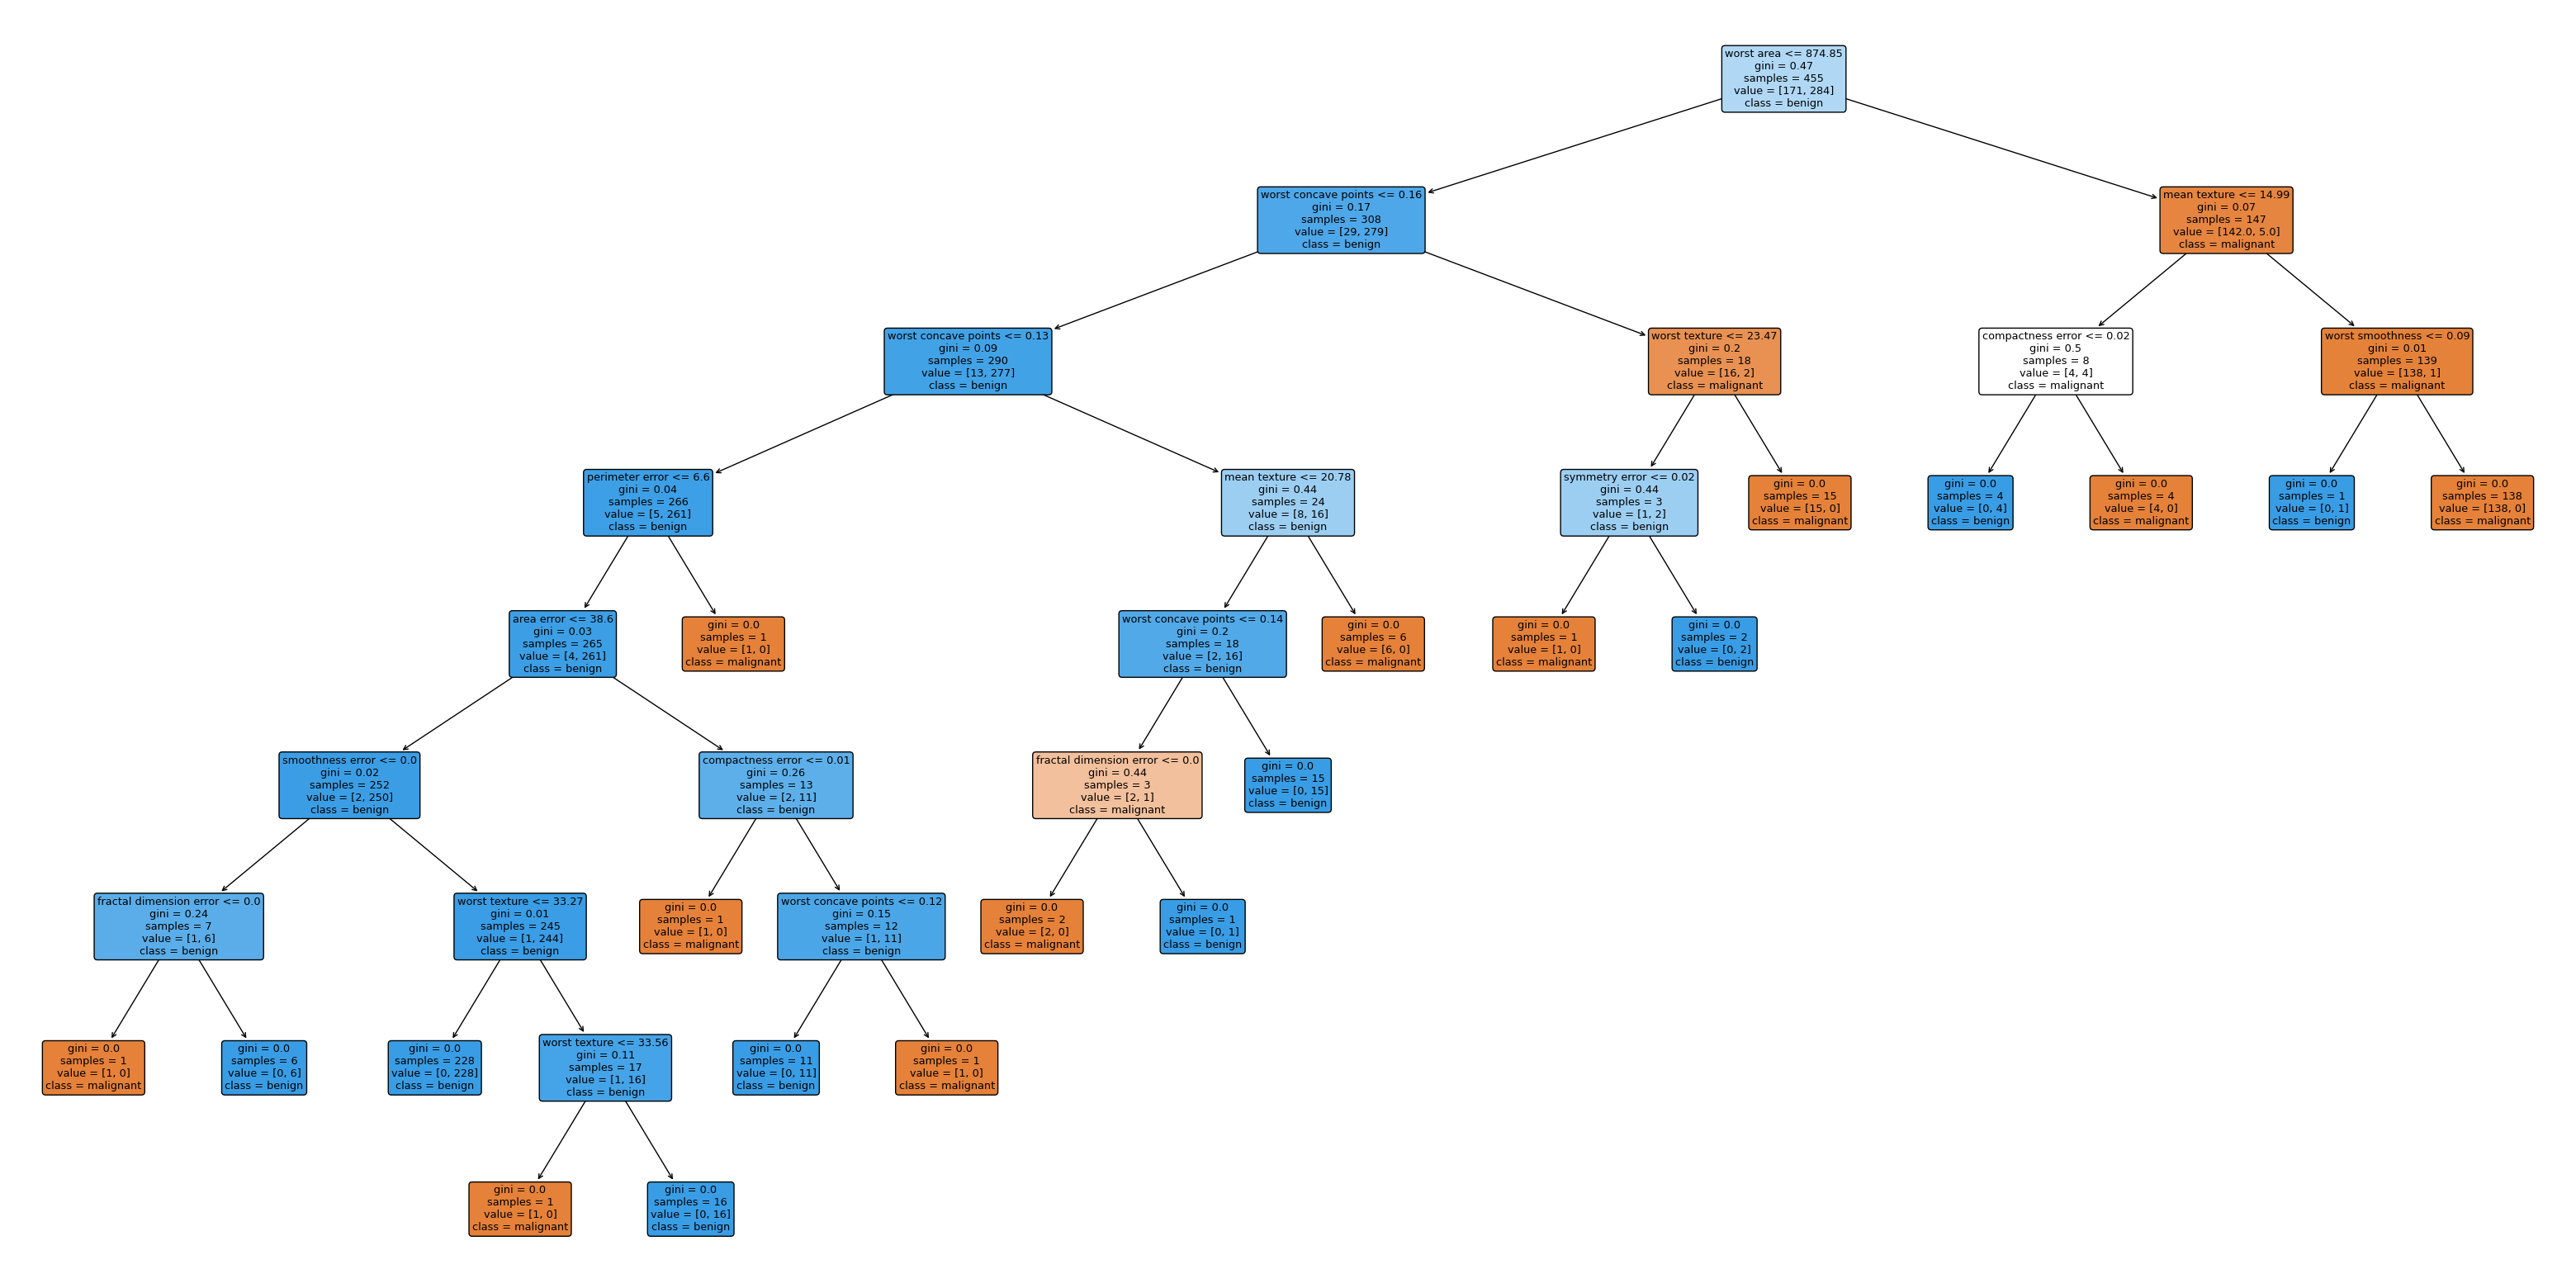

In [7]:
# Increase figure size such that labels are visible 
plt.figure(figsize=(40,20))
# Plot deicision matrix as tree
plot_tree(classifier, filled=True, feature_names=x.columns,class_names=data.target_names, rounded=True, proportion=False, precision=2)
plt.show()

### D10 [3 marks]

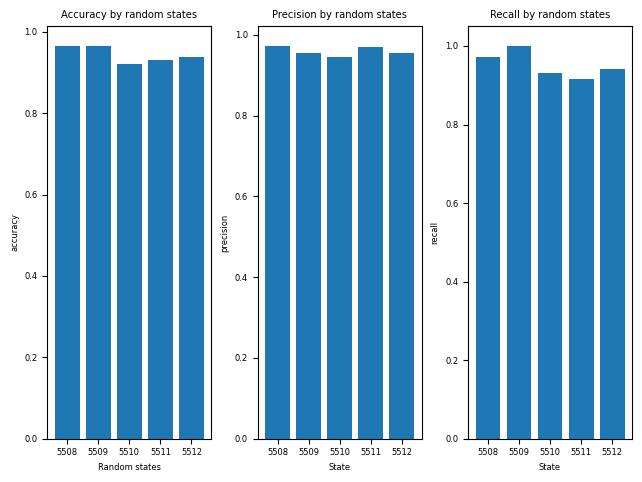

In [8]:
#55%


# scores (accuracy/precision/recall)
a = []
p = []
r = []

# list of states for the training/testing
states =[5508, 5509, 5510, 5511, 5512]

# For each state given, fit the data to a classifier
for i in range (len(states)):
    
    # Using given random states, split the data
    training, testing, labels, answers = train_test_split(x,y, test_size=0.2, random_state=states[i])
    
    # Create the classifier and fit with data 
    # Random state still set to 5508 as per the task
    classifier = DecisionTreeClassifier(random_state=5508)
    classifier.fit(training,labels)

    # TEST PERFORMANCE
    # Predictions for testing
    predictions= classifier.predict(testing)

    # Scores from testing (accuracy/precision/recall)
    a.append(accuracy_score (answers, predictions))
    p.append(precision_score (answers, predictions))
    r.append(recall_score (answers, predictions))

# Plot accuracy/precision/recall in subplots with labels
plt.subplot(1, 3, 1)
plt.bar(states, a)
plt.xlabel('Random states')
plt.ylabel('accuracy')
plt.title('Accuracy by random states')
plt.subplot(1, 3, 2)
plt.bar(states, p)
plt.xlabel('State')
plt.ylabel('precision')
plt.title('Precision by random states')
plt.subplot(1, 3, 3)
plt.bar(states, r)
plt.xlabel('State')
plt.ylabel('recall')
plt.title('Recall by random states')

# fit subplots to big plot
plt.tight_layout()
# show plot
plt.show()

### D11 [3 marks]

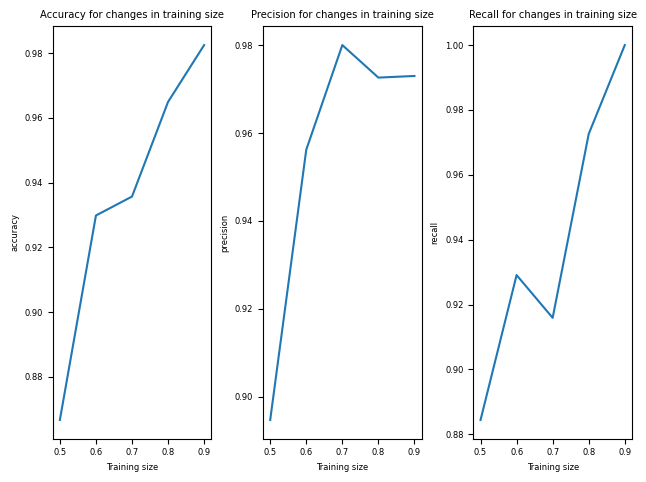

In [9]:
#82%

# list of split ratios for the training/testing
sizes = [0.5, 0.6, 0.7, 0.8, 0.9]

# scores (accuracy/precision/recall)
a = []
p = []
r = []

# For each size ratio, fit the data to a classifier
for i in range(len(sizes)):

    # Using given training sizes, split the data
    training, testing, labels, answers = train_test_split(x, y, train_size=sizes[i], random_state=5508)

    # Create the classifier and fit with data 
    # Random state still set to 5508 as per the task
    classifier= DecisionTreeClassifier (random_state=5508)
    classifier.fit (training, labels)

    # TEST PERFORMANCE
    # Predictions for testing
    predictions= classifier.predict(testing)

    # Scores from testing (accuracy/precision/recall)
    a.append(accuracy_score (answers, predictions))
    p.append(precision_score (answers, predictions))
    r.append(recall_score (answers, predictions))

# Plot accuracy/precision/recall in subplots with labels
plt.subplot(1, 3, 1)
plt.plot(sizes, a)
plt.title('Accuracy for changes in training size')
plt.xlabel('Training size')
plt.ylabel('accuracy')
plt.subplot(1, 3, 2)
plt.plot(sizes, p)
plt.title('Precision for changes in training size')
plt.xlabel('Training size')
plt.ylabel('precision')
plt.subplot(1, 3, 3)
plt.plot(sizes, r)
plt.title('Recall for changes in training size')
plt.xlabel('Training size')
plt.ylabel('recall')

# fit subplots to big plot
plt.tight_layout()
# show plot
plt.show()

### D12 [4 marks]

In [10]:
#56%

# Parameters set out in the task D11
parameters = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5],
}

# Create the classifier and fit with data 
classifier = DecisionTreeClassifier(random_state=5508)

# Cross validator with random state 42 
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Apply 10-fold cross validation to classifier 
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, cv=cv, scoring='accuracy')

# Using given data, split into training, testing etc. 
training, testing, labels, answers = train_test_split(x, y, test_size=0.2, random_state=5508)

# Do grid search
grid_search.fit(training, labels)

# return the best parameters and best classifier
best_parameters = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# perform trining set on data
predictions = best_classifier.predict(training)
accuracy_1 = accuracy_score(labels, predictions)
precision_1 = precision_score(labels, predictions)
recall_1 = recall_score(labels, predictions)

# test testing set on data
testing_predictions = best_classifier.predict(testing)
test_accuracy = accuracy_score(answers, testing_predictions)
test_preicision = precision_score(answers, testing_predictions)
test_recall = recall_score(answers, testing_predictions)

# print results
print("best parameters", best_parameters)

# for training set
print("Training set")
print(accuracy_1)
print(precision_1)
print(recall_1)

# for test set
print("Test set")
print(test_accuracy)
print(test_preicision)
print(test_recall)

# Confusion matrix print
print("Confusion matrix")
print(confusion_matrix(answers, testing_predictions))

best parameters {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training set
0.9648351648351648
0.9527027027027027
0.9929577464788732
Test set
0.9385964912280702
0.9583333333333334
0.9452054794520548
Confusion matrix
[[38  3]
 [ 4 69]]


### D14 [3 marks]

In [16]:
#64%

# Scoring options 
scoring_options = ['accuracy', 'precision', 'recall']

# For each scoring option, we want to find the optimal hyperparameters for each
# We will be performing 10 fold cross validation and grid search
for score in scoring_options:
    # Set up  grid search with random state with the scoring set according to input
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=5508), param_grid=parameters, cv=cv, scoring=score)
    grid_search.fit(training, labels)
    
    # return the best parameters and best classifier
    best_parameters = grid_search.best_params_
    classifier = grid_search.best_estimator_
    
    # test testing set on data and print results
    predictions = classifier.predict(testing)
    print(score)
    print(best_parameters)
    print(confusion_matrix(answers, predictions))

accuracy
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
[[38  3]
 [ 4 69]]
precision
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
[[39  2]
 [ 5 68]]
recall
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
[[38  3]
 [ 4 69]]


### D15 [1 mark]

In [17]:
# Best parameters from task D12
print(best_parameters)

#if re-initialisation required
# best_parameters = {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}  # Example parameters

# Initialize and train the classifier with the best parameters
best_classifier = DecisionTreeClassifier(**best_parameters, random_state=5508)
best_classifier.fit(training, labels)

# Extract feature importances
feature_importances = best_classifier.feature_importances_

# Create a DataFrame to view the feature names and their importance scores
importances_df = pd.DataFrame({
    'Feature': training.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the sorted DataFrame
print(importances_df)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
                    Feature  Importance
17               worst area    0.801542
19     worst concave points    0.151040
10          mean smoothness    0.019469
12             mean texture    0.012717
24            worst texture    0.011775
13          perimeter error    0.003456
5                 mean area    0.000000
16            texture error    0.000000
23           worst symmetry    0.000000
22         worst smoothness    0.000000
21  worst fractal dimension    0.000000
20          worst concavity    0.000000
2      concave points error    0.000000
18        worst compactness    0.000000
3           concavity error    0.000000
15           symmetry error    0.000000
6          mean compactness    0.000000
14         smoothness error    0.000000
1         compactness error    0.000000
11            mean symmetry    0.000000
4   fractal dimension error    0.000000
9    mean fractal dimension    0.000000
8            mea

### D16 [3 marks]

In [13]:
best_classifier.fit(training, labels)

# Create the selector object with a minimum feature importance of 0.01 and fit it
selector = SelectFromModel(best_classifier, threshold=0.01)
selector.fit(training, labels)  # Fit with feature names

# Use the selector to transform the data
X_selected = selector.transform(training)

# Get the features that were retained
selected_features = training.columns[selector.get_support()]

# Get the features that were not retained
removed_features = training.columns[~selector.get_support()]

# Calculate the total feature importance of the retained features
total_importance = sum(best_classifier.feature_importances_[selector.get_support()])

# Output the results
print("Retained Features:", selected_features.tolist())
print("Removed Features:", removed_features.tolist())
print("Total Feature Importance of Retained Features:", total_importance)

Retained Features: ['mean smoothness', 'mean texture', 'worst area', 'worst concave points', 'worst texture']
Removed Features: ['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean symmetry', 'perimeter error', 'smoothness error', 'symmetry error', 'texture error', 'worst compactness', 'worst concavity', 'worst fractal dimension', 'worst smoothness', 'worst symmetry']
Total Feature Importance of Retained Features: 0.9965437229287063


### D17 [3 marks]

In [14]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(x, y, test_size=0.2, random_state=5508)

# Split data with selected features (assuming 'selected_features' is defined from the previous steps)
X_train_reduced = X_train_full[selected_features]
X_test_reduced = X_test_full[selected_features]

# Train model on the full set of features
clf_full = DecisionTreeClassifier(random_state=5508, **best_parameters)
clf_full.fit(X_train_full, y_train_full)

# Train model on the reduced set of features
clf_reduced = DecisionTreeClassifier(random_state=5508, **best_parameters)
clf_reduced.fit(X_train_reduced, y_train_full)

# Evaluate on the training set
y_train_pred_full = clf_full.predict(X_train_full)
y_train_pred_reduced = clf_reduced.predict(X_train_reduced)

# Evaluate on the test set
y_test_pred_full = clf_full.predict(X_test_full)
y_test_pred_reduced = clf_reduced.predict(X_test_reduced)

accuracy_full_train = accuracy_score(y_train_full, y_train_pred_full)
precision_full_train = precision_score(y_train_full, y_train_pred_full)
recall_full_train = recall_score(y_train_full, y_train_pred_full)

accuracy_full_test = accuracy_score(y_test_full, y_test_pred_full)
precision_full_test = precision_score(y_test_full, y_test_pred_full)
recall_full_test = recall_score(y_test_full, y_test_pred_full)
conf_matrix_full_test = confusion_matrix(y_test_full, y_test_pred_full)

# Reduced feature set metrics
accuracy_reduced_train = accuracy_score(y_train_full, y_train_pred_reduced)
precision_reduced_train = precision_score(y_train_full, y_train_pred_reduced)
recall_reduced_train = recall_score(y_train_full, y_train_pred_reduced)

accuracy_reduced_test = accuracy_score(y_test_full, y_test_pred_reduced)
precision_reduced_test = precision_score(y_test_full, y_test_pred_reduced)
recall_reduced_test = recall_score(y_test_full, y_test_pred_reduced)
conf_matrix_reduced_test = confusion_matrix(y_test_full, y_test_pred_reduced)

# Output the results
print("Full Feature Set - Test Metrics:")
print(f"Accuracy: {accuracy_full_test:.2f}, Precision: {precision_full_test:.2f}, Recall: {recall_full_test:.2f}")
print("Confusion Matrix:")
print(conf_matrix_full_test)

print("\nReduced Feature Set - Test Metrics:")
print(f"Accuracy: {accuracy_reduced_test:.2f}, Precision: {precision_reduced_test:.2f}, Recall: {recall_reduced_test:.2f}")
print("Confusion Matrix:")
print(conf_matrix_reduced_test)

Full Feature Set - Test Metrics:
Accuracy: 0.94, Precision: 0.96, Recall: 0.95
Confusion Matrix:
[[38  3]
 [ 4 69]]

Reduced Feature Set - Test Metrics:
Accuracy: 0.94, Precision: 0.96, Recall: 0.95
Confusion Matrix:
[[38  3]
 [ 4 69]]


### D19 [3 marks]

In [15]:
training, testing, labels, answers = train_test_split(x, y, test_size=0.2, random_state=5508)
param_grid = {
    'n_estimators': [10, 20, 50, 100, 1000],
    'max_depth': [2, 3, 4, 5]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=5508)

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy')

# Perform the grid search
grid_search_rf.fit(training, labels)

# Extracting the best parameters and retraining
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Evaluations on the training set
y_train_pred_rf = best_rf.predict(training)
train_accuracy_rf = accuracy_score(labels, y_train_pred_rf)
train_precision_rf = precision_score(labels, y_train_pred_rf)
train_recall_rf = recall_score(labels, y_train_pred_rf)

# Evaluations on the test set
y_test_pred_rf = best_rf.predict(testing)
test_accuracy_rf = accuracy_score(answers, y_test_pred_rf)
test_precision_rf = precision_score(answers, y_test_pred_rf)
test_recall_rf = recall_score(answers, y_test_pred_rf)
conf_matrix_rf = confusion_matrix(answers, y_test_pred_rf)

# Displaying results
print("Optimal Number of Estimators:", best_params_rf['n_estimators'])
print("Optimal Max Depth:", best_params_rf['max_depth'])
print("\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy_rf:.2f}, Precision: {train_precision_rf:.2f}, Recall: {train_recall_rf:.2f}")
print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy_rf:.2f}, Precision: {test_precision_rf:.2f}, Recall: {test_recall_rf:.2f}")
print("\nConfusion Matrix on the Test Set:")
print(conf_matrix_rf)

Optimal Number of Estimators: 50
Optimal Max Depth: 5

Training Set Metrics:
Accuracy: 0.99, Precision: 0.99, Recall: 1.00

Test Set Metrics:
Accuracy: 0.98, Precision: 0.99, Recall: 0.99

Confusion Matrix on the Test Set:
[[40  1]
 [ 1 72]]
